<a href="https://colab.research.google.com/github/leehyell/AIStudy24/blob/master/%EC%9D%B4%EC%9B%83%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###이웃 회귀
> 지금은 여름, 농어철이다.
<br/>

---

MBC 마켓에서 업계 최초로 농어를 무게 단위로 판매하려고 한다.
<br/>
무게 단위로 판매를 한다면, 가격 측정이 원활하며 고객도 합리적으로 판단할 수 있다.
<br/>
하지만 공급처에서 생선 무게를 잘 못 측정하여 보낼 수도 있다.

---

그래서
<br/>
* 농어의 무게를 재측정 해야한다.
* 다른 데이터는 정상 범위가 있으니, 예측할 수 있을 것.
* 이처럼 <b>예측하는 것</b>을 회귀 라고 한다.
* 회귀를 위한 <b>샘플 데이터</b>가 필요하다.
* 외부에서 <b>56개의 샘플</b>을 받아서 처리하자.

---


###지도 학습

---

* 분류
<br/>
└ 2진 분류
<br/>
* 회귀
<br/>
└ 임의의 숫자로 예측
<br/><br/>
회귀: 두 변수 사이에 상관관계를 분석하는 방법



---



In [1]:
#리눅스 명령어로 코랩의 가상머신에 나눔폰트를 설치, 적용하는 명령어.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
#농어의 샘플자료 56개
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

기초자료


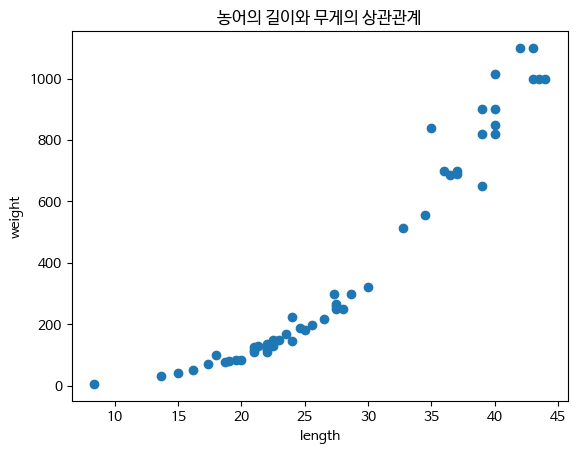

In [4]:
import matplotlib.pyplot as plt
#한글처리
plt.rc('font', family='NanumBarunGothic')

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
print('기초자료')
plt.title('농어의 길이와 무게의 상관관계')
plt.show()

#산점도 분석 결과 길이가 커짐에 따라 무게도 늘어남.
#이 데이터를 토대로 훈련과 테스트를 진행해보자.

###k-최근접 이웃 알고리즘에서의 회귀

---

* 예측하려는 샘플에 가장 가까운 샘플 k개를 선택.
* 이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측.
* k=3이라고 가정하면 2개의 다수가 있어 분류는 사각형으로 판단.
* 회귀는 샘플에 가장 가까운 샘플 k개를 선택.
* 타겟 100, 80, 60을 더해 3으로 나눈 평균값이 타겟값으로 사용.

In [6]:
#사이킷런에서 제공하는 훈련세트, 테스트세트 생성
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
#사이킷 런의 train_test_split 함수를 사용하여 훈련세트와 테스트 세트로 나눔.

#사이킷 런에 사용할 훈련세트는 2차원 배열을 사용.
#perch_length가 1차원 배열이므로, train_input, test_input 역시 1차원 배열

In [7]:
#2차원 배열을 사용해야 하기 때문에 reshape() 메소드를 활용하여 강제로 2차원으로 배열
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [12]:
#2차원 배열로 변환 필요
test_array = test_array.reshape(2,2)
print(test_array.shape)
print(test_array)

#2개의 특성으로 사용했었기 때문에 자연스럽게 열이 2개인 2차원 배열을 사용했지만,
#현재는 특성이 1개라 수동으로 2차원 배열로 만들어줘야 함.(numpy.reshape() 사용.)
#(4,) -> (2,2) 크기로 바꿔줌.

(2, 2)
[[1 2]
 [3 4]]


In [18]:
#입력 데이터인 train_input과 test_input을 2차원 배열로 바꿔야함.
#train_input(42,) -> train_input(42,1)
#넘파이는 배열의 크기를 자동으로 지정하는 기능을 제공.
#-1 : 원소 개수로 모두 채워라.
# 1 : 두번째로 모두 채워라.
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
#-1을 지정해주면 원소의 크기를 외우지 않아도 됨.
print(train_input.shape,test_input.shape)

(42, 1) (14, 1)


###분류/회귀

---

* 분류: KNeighborsClassifier
* 회귀: KNeighborsRegressor

In [20]:
#전처리 끗

#훈련 시작
#회귀용 클래스 import
from sklearn.neighbors import KNeighborsRegressor
#회귀용 객체 생성
knr = KNeighborsRegressor()
#회귀용 훈련
knr.fit(train_input, train_target)
#회귀용 평가
knr.score(test_input, test_target)
#분류의 경우 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율 -> 예측값

0.992809406101064

###회귀

---

* 회귀인 경우에는 평가를 결정 계수라고 함(R^2; 제곱)
* R^2 = 1 - ((타겟 - 예측)^2의 합) / ((타겟 - 평균)^2의 합)
* 타켓의 평균 정도를 예측하는 수준 -> R^2는 0에 가까워지고, 예측이 타겟에 가까워지면 1에 가까운 값

In [23]:
#sklearn - 사이킷런.
#sklearn.metrics 패키지 아래 여러 측정 도구를 제공함.
#mean_absolute_error: 절대값 오차를 평균하여 반환.
from sklearn.metrics import mean_absolute_error

#테스트세트에 대한 예측.
test_prediction = knr.predict(test_input)

#테스트 세트에 대한 평균 절대값 오차를 계산.
mae = mean_absolute_error(test_target, test_prediction)

print(mae)
#계산 결과 19g 정도 타겟값과 다르다.
#└ 타겟과 예측한 값 사이의 차이

19.157142857142862


In [25]:
#훈련 모델을 사용하여 훈련 세트 점수 확인
print(knr.score(train_input, train_target))

0.9698823289099254


###결과

---

* 위 결과를 보면, 모델을 훈련 세트에 훈련하면 훈련 세트에 잘 맞는 모델이 만들어짐.
* 이 모델을 훈련 세트와 테스트 세트에서 평가하면 두 값 중 어느 것이 더 높을까?
* 보통 훈련 세트의 점수가 조금 더 높게 나옴.
 * <b>과대 적합</b>: 훈련 세트에서 점수가 좋았는데, 테스트 세트에서는 점수가 나쁘거나 점수가 100%일 경우.
 * <b>과소 적합</b>: 훈련 세트보다 테스트 세트가 점수가 높거나 두 점수가 모두 낮은 경우.

---

훈련용: 0.9698823289099254(%)
<br/>
테스트용: 0.992809406101064(%)
<br/>
현재의 상태는 <b>과소 적합</b>

---


In [30]:
#사이킷 런의 알고리즘 기본 값을 3개로 조절해보자.
knr.n_neighbors = 3
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [32]:
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))
#훈련용: 0.9804899950518966(%)
#테스트: 0.9746459963987609(%)
#과소, 과대 모두 아니므로 우수한 결과가 나옴.

0.9804899950518966
0.9746459963987609


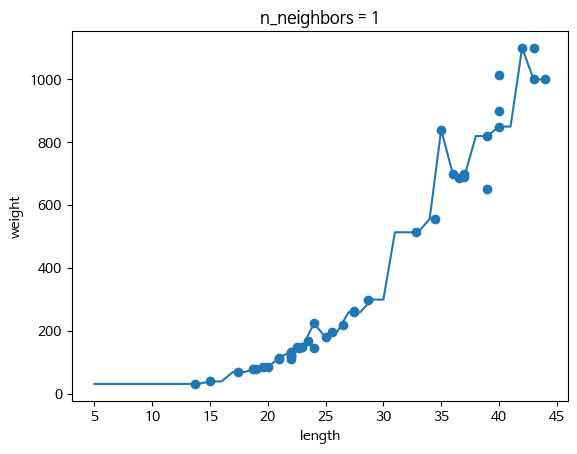

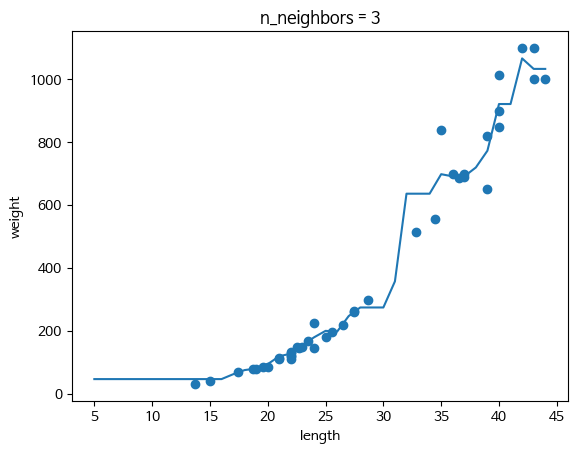

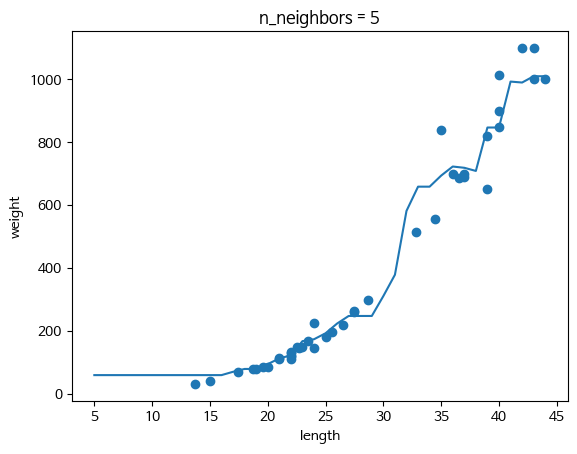

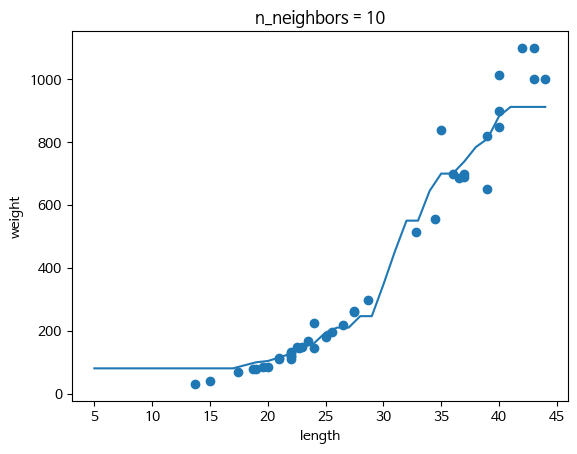

In [37]:
#k-최근접 이웃 회귀 객체 생성.
knr = KNeighborsRegressor()
#5에서 45까지 x 좌표 생성.
x = np.arange(5,45).reshape(-1,1)
#n = 1, 3, 5, 10일 때 예측 결과를 그래프로 생성.
for n in [1, 3, 5, 10]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    #지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)
    #훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel ('length')
    plt.ylabel ('weight')
    plt.show()